# 라이브러리 설치하기

In [2]:
# ! pip install pyarrow

# 라이브러리 불러오기

In [3]:
import pandas as pd
import numpy as np
from glob import glob
import os
import polars as pl
from collections import Counter
import plotly.graph_objects as go
import plotly.express as px
import geopandas as gpd
import pycountry
from plotly.subplots import make_subplots
from scipy.stats import chi2_contingency
from matplotlib import pyplot as plt
import seaborn as sns

---

# 데이터 불러오기

## 파일 경로 찾기

In [4]:
"""
os.walk()

for root, dirs, files in os.walk(startpath):
        print("현재 디렉토리:", root)
        print("하위 디렉토리들:", dirs)
        print("파일들:", files)
        
os.path.join()

path = os.path.join("폴더1", "폴더2", "파일.txt")
file_name = "example.txt"
full_path = os.path.join(base_path, file_name)

"""

'\nos.walk()\n\nfor root, dirs, files in os.walk(startpath):\n        print("현재 디렉토리:", root)\n        print("하위 디렉토리들:", dirs)\n        print("파일들:", files)\n        \nos.path.join()\n\npath = os.path.join("폴더1", "폴더2", "파일.txt")\nfile_name = "example.txt"\nfull_path = os.path.join(base_path, file_name)\n\n'

In [5]:
def list_files(startpath, file_path_list):
    for root, dirs, files in os.walk(startpath):
        print("현재 디렉토리:", root)
        print("하위 디렉토리들:", dirs)
        print("파일들:", files)
        for file in files:
            print()
            print("파일 경로:", root + '/' + file)
            file_path_list.append(root + '/' + file)
        print()

In [6]:
file_path_list = []
list_files("./data/archive",file_path_list)

현재 디렉토리: ./data/archive
하위 디렉토리들: []
파일들: ['distribution_centers.csv', 'events.csv', 'inventory_items.csv', 'orders.csv', 'order_items.csv', 'products.csv', 'users.csv']

파일 경로: ./data/archive/distribution_centers.csv

파일 경로: ./data/archive/events.csv

파일 경로: ./data/archive/inventory_items.csv

파일 경로: ./data/archive/orders.csv

파일 경로: ./data/archive/order_items.csv

파일 경로: ./data/archive/products.csv

파일 경로: ./data/archive/users.csv



In [7]:
# for i in file_path_list:
#     print(i.split("/")[-1])
#     print(i)
#     print(pl.read_csv(i).head())
#     print()

## polars -> DataFrame

In [8]:
pl_df_list = []
for i in file_path_list:
    pl_df_list.append(pl.read_csv(i))

## polars_df -> pandas_df

In [9]:
pd_distribution_centers = pl_df_list[0].to_pandas()
pd_events = pl_df_list[1].to_pandas()
pd_inventory_items = pl_df_list[2].to_pandas()
pd_orders = pl_df_list[3].to_pandas()
pd_order_items = pl_df_list[4].to_pandas()
pd_products = pl_df_list[5].to_pandas()
pd_users = pl_df_list[6].to_pandas()

---

# 데이터 살펴보기

---

## 데이터 전부 보이기

In [10]:
# pd.set_option("display.max_rows", None)
# pd.set_option("display.max_columns", None)

---

## distribution_centers
id: 각 유통센터의 고유식별자입니다.  
name: 유통센터명.  
latitude: 물류센터의 위도좌표입니다.  
longitude: 물류센터의 경도좌표입니다.  

In [11]:
pd_distribution_centers.head()

,id,name,latitude,longitude
0,1,Memphis TN,35.1174,-89.9711
1,2,Chicago IL,41.8369,-87.6847
2,3,Houston TX,29.7604,-95.3698
3,4,Los Angeles CA,34.0500,-118.2500
4,5,New Orleans LA,29.9500,-90.0667


In [12]:
pd_distribution_centers["id"].value_counts(dropna = False).unique()

array([1], dtype=int64)

---

## events
id: 각 이벤트의 고유 식별자입니다.  
user_id: 이벤트와 연결된 사용자의 식별자입니다.  
sequence_number: 이벤트의 발생 순서입니다.  
session_id: 이벤트가 발생한 세션의 식별자입니다.  
created_at: 이벤트가 발생한 시간을 나타내는 타임스탬프입니다.  
ip_address: 이벤트가 발생한 IP 주소입니다.  
city: 이벤트가 발생한 도시입니다.  
state: 이벤트가 발생한 주(state)입니다.  
postal_code: 이벤트 위치의 우편 번호입니다.  
browser: 이벤트 중에 사용된 웹 브라우저입니다.  
traffic_source: 이벤트로 이어진 트래픽의 출처입니다.  
uri: 이벤트와 관련된 URI(Uniform Resource Identifier)입니다.  
event_type: 기록된 이벤트의 유형입니다.  

In [13]:
pd_events.head()

,id,user_id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,traffic_source,uri,event_type
0,2198523,None,3,83889ed2-2adc-4b9a-af5d-154f6998e778,2021-06-17 17:30:00+00:00,138.143.9.202,São Paulo,São Paulo,02675-031,Chrome,Adwords,/cancel,cancel
1,1773216,None,3,7a3fc3f2-e84f-44fe-8876-eff76741f7a3,2020-08-07 08:41:00+00:00,85.114.141.79,Santa Isabel,São Paulo,07500-000,Safari,Adwords,/cancel,cancel
2,2380515,None,3,13d9b2fb-eee1-43fd-965c-267b38dd7125,2021-02-15 18:48:00+00:00,169.250.255.132,Mairiporã,São Paulo,07600-000,IE,Adwords,/cancel,cancel
3,2250597,None,3,96f1d44e-9621-463c-954c-d8deb7fffe7f,2022-03-30 10:56:00+00:00,137.25.222.160,Cajamar,São Paulo,07750-000,Chrome,Adwords,/cancel,cancel
4,1834446,None,3,d09dce10-a7cb-47d3-a9af-44975566fa03,2019-09-05 01:18:00+00:00,161.114.4.174,São Paulo,São Paulo,09581-680,Chrome,Email,/cancel,cancel


In [14]:
pd_events["user_id"].value_counts(dropna = False).unique()

array([1125671,     164,     161,     156,     148,     139,     134,
           132,     126,     123,     118,     117,     114,     110,
           109,     104,     101,      96,      95,      94,      92,
            90,      88,      87,      85,      82,      80,      79,
            76,      74,      72,      71,      70,      67,      66,
            65,      63,      62,      60,      58,      57,      56,
            54,      52,      49,      47,      45,      44,      42,
            40,      38,      35,      33,      30,      29,      28,
            24,      20,      19,      15,      14,      10,       5],
      dtype=int64)

---

## inventory_items
id: 각 재고 항목의 고유 식별자입니다.  
product_id: 관련 제품의 식별자입니다.  
created_at: 재고 항목이 생성된 타임스탬프입니다.  
sold_at: 상품이 판매된 시간을 나타내는 타임스탬프입니다.  
cost: 재고 항목의 비용입니다.  
product_category: 관련 제품의 카테고리입니다.  
product_name: 관련 제품의 이름입니다.  
product_brand: 관련 제품의 브랜드입니다.  
product_retail_price: 관련 제품의 소매 가격입니다.  
product_department: 제품이 속한 부서입니다.  
product_sku: 제품의 SKU(재고 번호)입니다.  
product_distribution_center_id: 제품과 관련된 유통 센터의 식별자입니다.  

In [15]:
pd_inventory_items.head()

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id
0,67971,13844,2022-07-02 07:09:20+00:00,2022-07-24 06:33:20+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
1,67972,13844,2023-12-20 03:28:00+00:00,None,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
2,67973,13844,2023-06-04 02:53:00+00:00,None,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
3,72863,13844,2021-10-16 22:58:52+00:00,2021-11-22 02:19:52+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
4,72864,13844,2021-08-07 16:33:00+00:00,None,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7


In [16]:
pd_inventory_items["product_id"].value_counts().unique()

array([58, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38,
       37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21,
       20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,
        3,  2], dtype=int64)

---

## order_items
id: 각 주문 항목의 고유 식별자입니다.  
order_id: 관련 주문의 식별자입니다.  
user_id: 주문을 한 사용자의 식별자입니다.  
product_id: 관련 제품의 식별자입니다.  
inventory_item_id: 관련 재고 항목의 식별자입니다.  
status: 주문 항목의 상태입니다.  
created_at: 주문 항목이 생성된 시간을 나타내는 타임스탬프입니다.  
shipped_at: 주문 항목이 배송된(출발) 시간을 나타내는 타임스탬프입니다.  
delivered_at: 주문 항목이 배송된(도착) 시간을 나타내는 타임스탬프입니다.  
returned_at: 주문 항목이 반환된 시간을 나타내는 타임스탬프입니다.  

In [17]:
pd_order_items.head()

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
0,152013,104663,83582,14235,410368,Cancelled,2023-05-07 06:08:40+00:00,None,None,None,0.02
1,40993,28204,22551,14235,110590,Complete,2023-03-14 03:47:21+00:00,2023-03-15 22:57:00+00:00,2023-03-18 01:08:00+00:00,None,0.02
2,51224,35223,28215,14235,138236,Complete,2023-12-05 13:25:30+00:00,2023-12-06 01:20:00+00:00,2023-12-10 10:04:00+00:00,None,0.02
3,36717,25278,20165,14235,99072,Shipped,2023-12-22 20:48:19+00:00,2023-12-24 16:44:00+00:00,None,None,0.02
4,131061,90241,71954,14235,353798,Shipped,2022-06-19 16:57:59+00:00,2022-06-19 19:29:00+00:00,None,None,0.02


In [77]:
pd_order_items["user_id"].value_counts(dropna= False).unique()

array([14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1],
      dtype=int64)

---

## orders
order_id: 각 주문의 고유 식별자입니다.  
user_id: 주문을 한 사용자의 식별자입니다.  
status: 주문의 상태입니다.  
gender: 사용자의 성별 정보입니다.  
created_at: 주문이 생성된 시간을 나타내는 타임스탬프입니다.  
returned_at: 주문이 반환된 시간을 나타내는 타임스탬프입니다.  
shipped_at: 주문이 발송된 시간을 나타내는 타임스탬프입니다.  
delivered_at: 주문이 배송된 시간을 나타내는 타임스탬프입니다.  
num_of_item: 주문에 포함된 상품 수입니다.  

In [19]:
pd_orders.head()

,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item
0,8,5,Cancelled,F,2022-10-20 10:03:00+00:00,None,None,None,3
1,60,44,Cancelled,F,2023-01-20 02:12:00+00:00,None,None,None,1
2,64,46,Cancelled,F,2021-12-06 09:11:00+00:00,None,None,None,1
3,89,65,Cancelled,F,2020-08-13 09:58:00+00:00,None,None,None,1
4,102,76,Cancelled,F,2023-01-17 08:17:00+00:00,None,None,None,2


In [20]:
pd_orders["user_id"].value_counts().unique()

array([4, 3, 2, 1], dtype=int64)

---

## products
id: 각 제품의 고유 식별자입니다.  
cost: 제품의 비용입니다.  
category: 제품이 속한 카테고리입니다.  
name: 제품의 이름입니다.  
brand: 제품의 브랜드입니다.  
retail_price: 제품의 소매 가격입니다.  
department: 제품이 속한 부서입니다.  
sku: 제품의 SKU(재고 번호)입니다.  
distribution_center_id: 제품과 관련된 유통 센터의 식별자입니다.  

In [21]:
pd_products.head()

,id,cost,category,name,brand,retail_price,department,sku,distribution_center_id
0,13842,2.51875,Accessories,Low Profile Dyed Cotton Twill Cap - Navy W39S55D,MG,6.25,Women,EBD58B8A3F1D72F4206201DA62FB1204,1
1,13928,2.33835,Accessories,Low Profile Dyed Cotton Twill Cap - Putty W39S55D,MG,5.95,Women,2EAC42424D12436BDD6A5B8A88480CC3,1
2,14115,4.87956,Accessories,Enzyme Regular Solid Army Caps-Black W35S45D,MG,10.99,Women,EE364229B2791D1EF9355708EFF0BA34,1
3,14157,4.64877,Accessories,Enzyme Regular Solid Army Caps-Olive W35S45D (...,MG,10.99,Women,00BD13095D06C20B11A2993CA419D16B,1
4,14273,6.50793,Accessories,Washed Canvas Ivy Cap - Black W11S64C,MG,15.99,Women,F531DC20FDE20B7ADF3A73F52B71D0AF,1


In [22]:
pd_products["id"].value_counts().unique()

array([1], dtype=int64)

---

## users
id: 각 사용자의 고유 식별자입니다.  
first_name: 사용자의 이름입니다.  
last_name: 사용자의 성입니다.  
email: 사용자의 이메일 주소입니다.  
age: 사용자의 나이입니다.  
gender: 사용자의 성별입니다.  
state: 사용자가 위치한 주(state)입니다.  
street_address: 사용자의 거리 주소입니다.  
postal_code: 사용자의 우편 번호입니다.  
city: 사용자가 위치한 도시입니다.  
country: 사용자가 위치한 국가입니다.  
latitude: 사용자의 위도 좌표입니다.  
longitude: 사용자의 경도 좌표입니다.  
traffic_source: 사용자 트래픽의 출처입니다.  
created_at: 사용자 계정이 생성된 시간을 나타내는 타임스탬프입니다.  

In [23]:
pd_users.head()

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at
0,457,Timothy,Bush,timothybush@example.net,65,M,Acre,87620 Johnson Hills,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2022-07-19 13:51:00+00:00
1,6578,Elizabeth,Martinez,elizabethmartinez@example.com,34,F,Acre,1705 Nielsen Land,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2023-11-08 18:49:00+00:00
2,36280,Christopher,Mendoza,christophermendoza@example.net,13,M,Acre,125 Turner Isle Apt. 264,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Email,2019-08-24 06:10:00+00:00
3,60193,Jimmy,Conner,jimmyconner@example.com,64,M,Acre,0966 Jose Branch Apt. 008,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2020-02-15 11:26:00+00:00
4,64231,Natasha,Wilson,natashawilson@example.net,25,F,Acre,20798 Phillip Trail Apt. 392,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2020-03-13 06:45:00+00:00


In [24]:
pd_users["id"].value_counts().unique()

array([1], dtype=int64)

In [25]:
pd_users

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at
0,457,Timothy,Bush,timothybush@example.net,65,M,Acre,87620 Johnson Hills,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Search,2022-07-19 13:51:00+00:00
1,6578,Elizabeth,Martinez,elizabethmartinez@example.com,34,F,Acre,1705 Nielsen Land,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Search,2023-11-08 18:49:00+00:00
2,36280,Christopher,Mendoza,christophermendoza@example.net,13,M,Acre,125 Turner Isle Apt. 264,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Email,2019-08-24 06:10:00+00:00
3,60193,Jimmy,Conner,jimmyconner@example.com,64,M,Acre,0966 Jose Branch Apt. 008,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Search,2020-02-15 11:26:00+00:00
4,64231,Natasha,Wilson,natashawilson@example.net,25,F,Acre,20798 Phillip Trail Apt. 392,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Search,2020-03-13 06:45:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,93247,Crystal,Williams,crystalwilliams@example.com,36,F,Île-de-France,984 Brady Branch,77120,Beautheil-Saints,France,48.789740,3.095796,Search,2021-02-13 01:36:00+00:00
99996,59110,Daniel,Griffin,danielgriffin@example.org,12,M,Île-de-France,89560 Phillips Lakes Apt. 604,77160,Chenoise-Cucharmoy,France,48.589783,3.243343,Organic,2022-09-01 12:01:00+00:00
99997,57045,Olivia,Wiley,oliviawiley@example.org,53,F,Île-de-France,749 Ronald Forge,77320,Choisy-en-Brie,France,48.763993,3.319993,Search,2021-06-19 11:39:00+00:00
99998,73312,Emily,Bird,emilybird@example.org,16,F,Île-de-France,78117 Anderson Oval,77320,Choisy-en-Brie,France,48.763993,3.319993,Search,2023-08-08 16:24:00+00:00


---

# 가입자 인구 통계 분석
users.csv를 사용하여 나이, 성별 및 위치와 같은 가입자 인구 통계를 분석합니다.

---

## 성별에 따른 가입자 분포

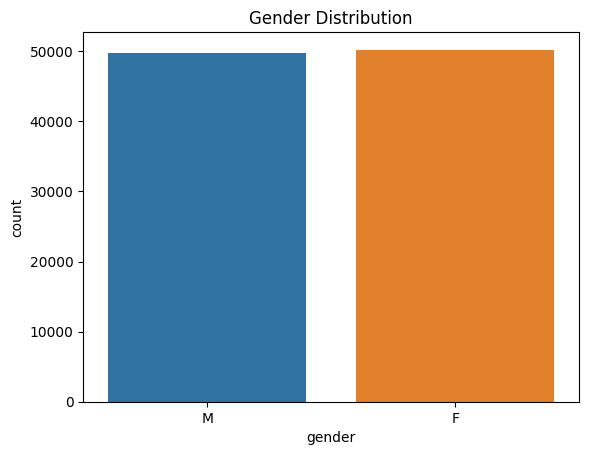

In [26]:
sns.countplot(x='gender', data=pd_users)
plt.title('Gender Distribution')
plt.show()

---

## 연령에 따른 가입자 분포

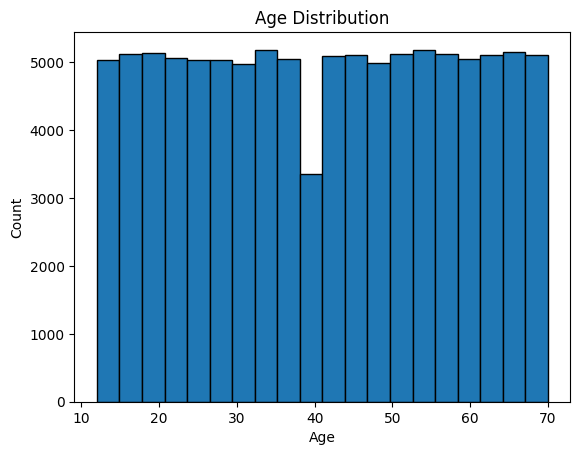

In [27]:
plt.hist(pd_users['age'], bins=20, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

---

## 나라에 따른 가입자 분포

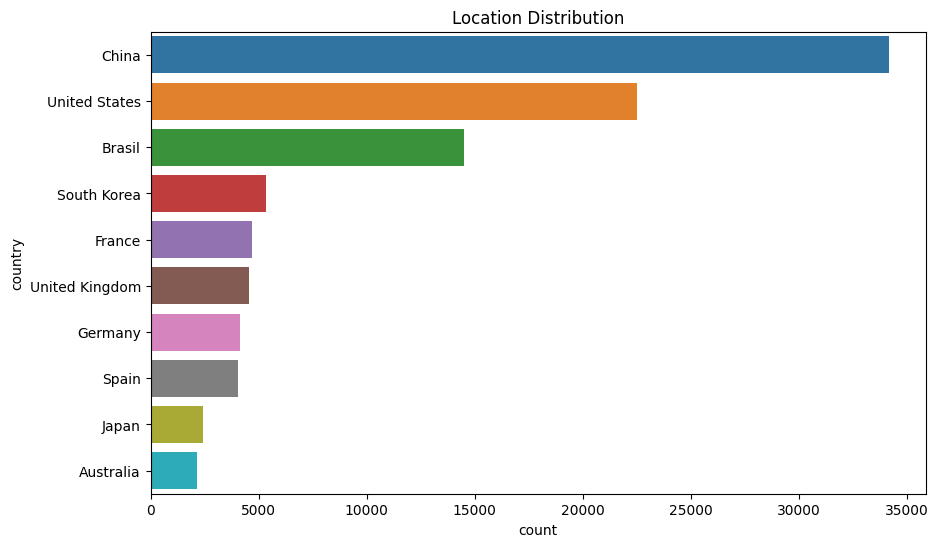

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(y='country', data=pd_users, order=pd_users['country'].value_counts().index[:10])
plt.title('Location Distribution')
plt.show()

## 도시에 따른 사용자 분포

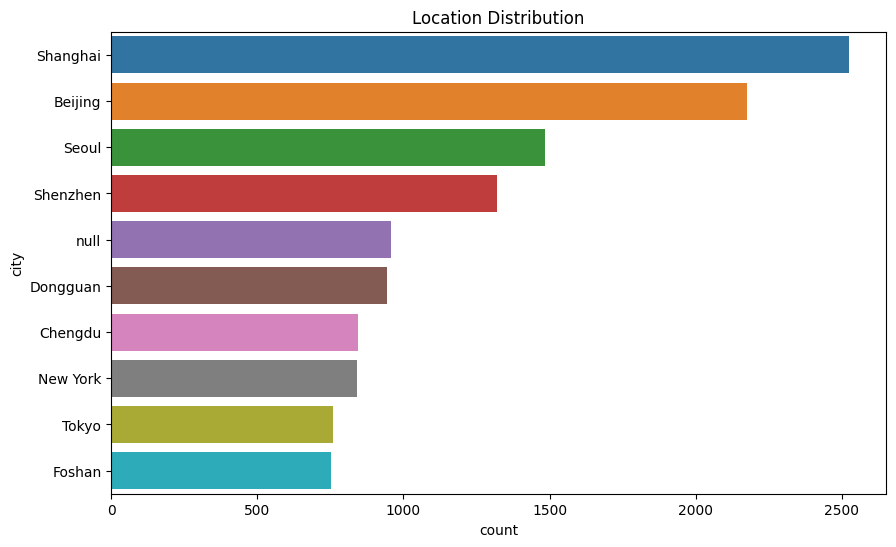

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(y='city', data=pd_users, order=pd_users['city'].value_counts().index[:10])
plt.title('Location Distribution')
plt.show()

---

## 날짜에 따른 가입자 수 

### 날짜별로 가입자 수
2024-01-11 이후 가입자가 급격하게 늘어남

In [30]:
pd_users['created_at'] = pd.to_datetime(pd_users['created_at'])

# 날짜별 가입 수 집계
daily_signups = pd_users['created_at'].dt.date.value_counts().sort_index()

# 결과 출력
print(daily_signups)


2019-01-02     59
2019-01-03     55
2019-01-04     48
2019-01-05     60
2019-01-06     59
             ... 
2024-01-12    458
2024-01-13    472
2024-01-14    456
2024-01-15    460
2024-01-16    432
Name: created_at, Length: 1841, dtype: int64


### 날짜별 가입자 그래프

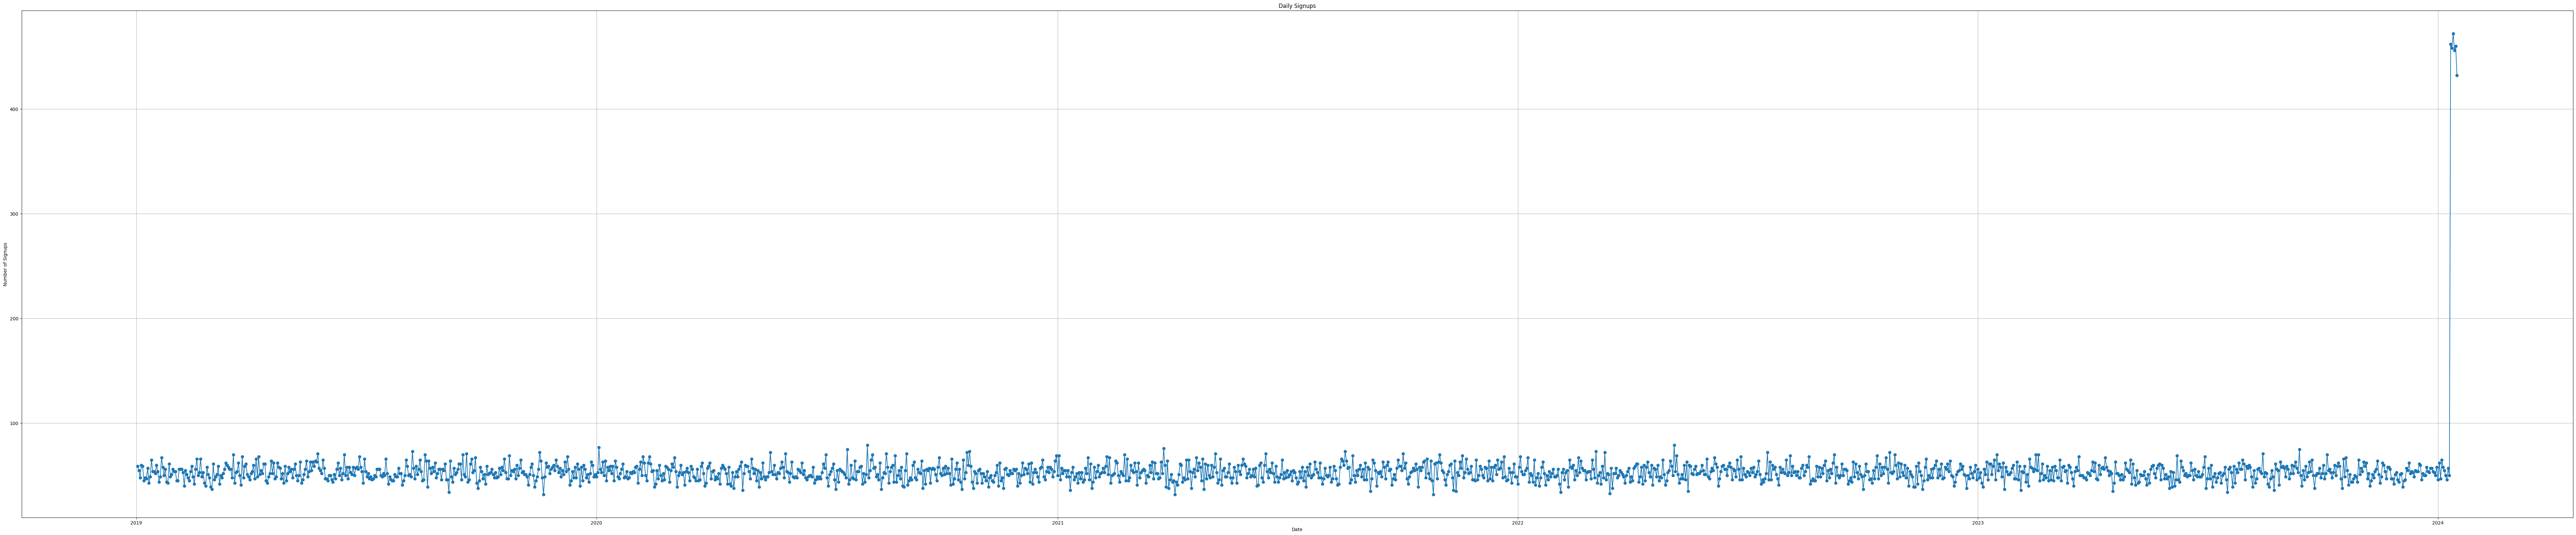

In [31]:
plt.figure(figsize=(100,20))
daily_signups.plot(kind='line', marker='o', linestyle='-')
plt.title('Daily Signups')
plt.xlabel('Date')
plt.ylabel('Number of Signups')
plt.grid(True)
plt.show()

#### 2024_01_11 이후로 가입자

In [32]:
pd_users_2024_01_11 = pd_users[pd_users['created_at']>= "2024-01-11"]

##### 2024_01_11 이후로 가입자의 성별에 따른 분포

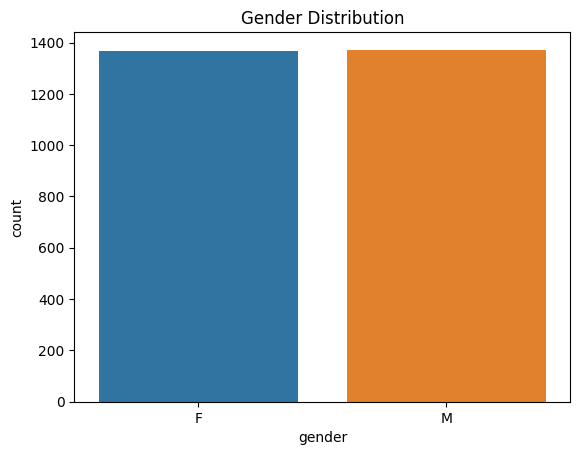

In [33]:
sns.countplot(x='gender', data=pd_users_2024_01_11)
plt.title('Gender Distribution')
plt.show()

##### 2024_01_11 이후로 가입자의 나이에 따른 분포

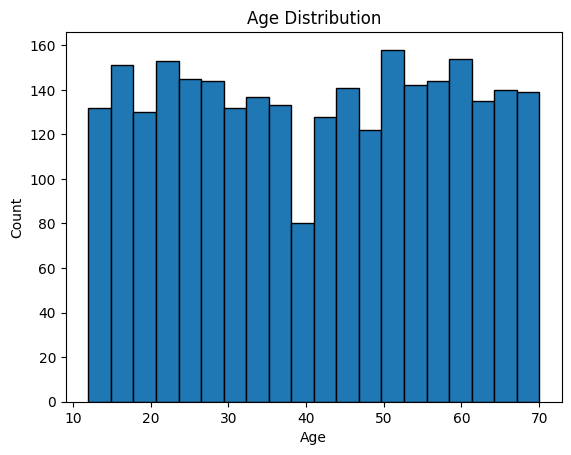

In [34]:
plt.hist(pd_users_2024_01_11['age'], bins=20, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

##### 2024_01_11 이후로 가입자의 나라에 따른 분포

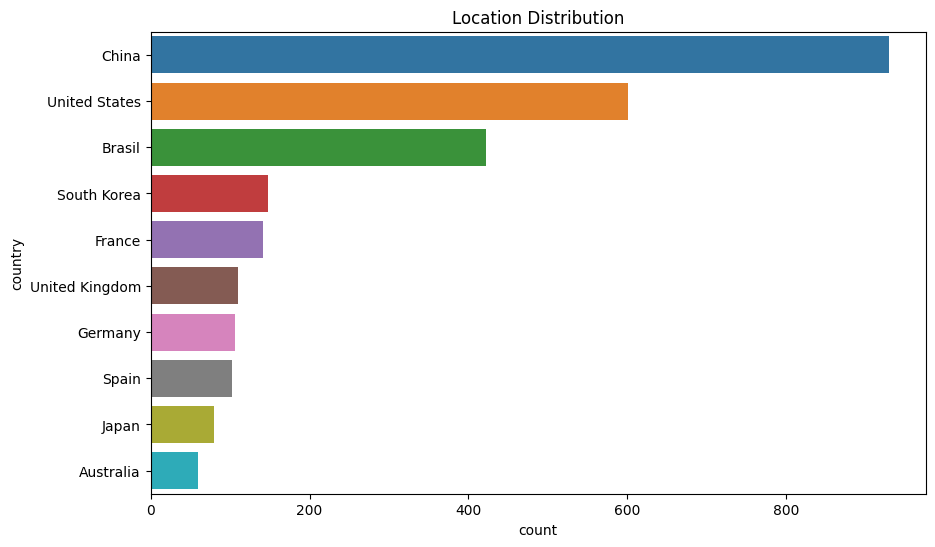

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(y='country', data=pd_users_2024_01_11, order=pd_users_2024_01_11['country'].value_counts().index[:10])
plt.title('Location Distribution')
plt.show()

##### 2024_01_11 이후로 가입자의 도시에 따른 분포

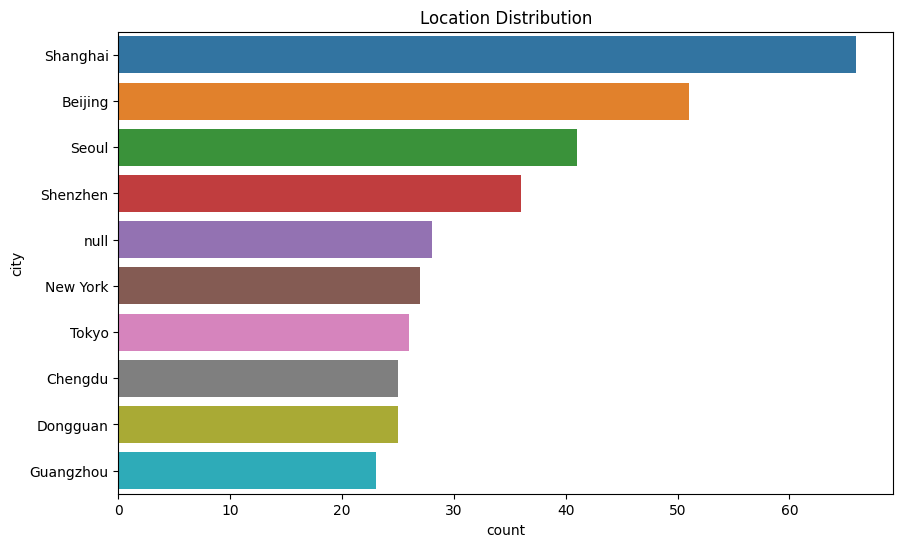

In [36]:
plt.figure(figsize=(10,6))
sns.countplot(y='city', data=pd_users_2024_01_11, order=pd_users_2024_01_11['city'].value_counts().index[:10])
plt.title('Location Distribution')
plt.show()

#### 2024_01_11 이후 events 확인하기

In [37]:
pd_events['created_at'] = pd.to_datetime(pd_events['created_at'])

In [38]:
pd_events_2024_01_11 = pd_events[pd_events['created_at']>= "2024-01-11"]

In [39]:
pd_events_2024_01_11

,id,user_id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,traffic_source,uri,event_type
260,2237632,None,3,12593207-cacf-467d-aa9f-1e8aa8ba6b20,2024-01-11 13:31:00+00:00,170.63.120.179,Boulazac Isle Manoire,Nouvelle-Aquitaine,24750,IE,Email,/cancel,cancel
427,2144419,None,3,2d57da43-71fe-4019-99a1-39c28b010cf7,2024-01-16 18:21:00+00:00,171.55.107.157,Jiaxing,Jiangxi,337014,IE,Adwords,/cancel,cancel
497,1851404,None,3,1f78eead-9f15-4e8b-9000-4bb2231372d7,2024-01-14 08:09:00+00:00,14.132.194.247,Montes Claros,Minas Gerais,39401,Chrome,Adwords,/cancel,cancel
684,1476536,None,3,1a9d3380-a75e-4390-8fae-52ada12df9a8,2024-01-13 07:08:00+00:00,133.62.160.33,Shaoyang,Guangdong,515141,Firefox,Adwords,/cancel,cancel
1121,2103194,None,3,57b64535-73dd-492e-9752-2ce47ddf0148,2024-01-11 14:43:00+00:00,175.93.71.20,Los Angeles,California,90731,Chrome,Email,/cancel,cancel
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2431915,1298684,99390.0,5,ae881a4d-0956-4e4b-a4b4-4ddb6740e07d,2024-01-15 09:00:06.282165+00:00,191.224.17.72,Pudsey,England,LS28,Firefox,Email,/purchase,purchase
2431934,175042,13513.0,7,ee82c742-1d57-4912-8d6a-31d48b8f5c0f,2024-01-16 06:33:37.523713+00:00,168.131.190.162,Perth,Scotland,PH1,Safari,Adwords,/purchase,purchase
2431936,198672,15270.0,5,d670b62d-33ad-43d7-ae34-7a7d80316895,2024-01-15 16:15:14.460314+00:00,102.82.159.2,Hornchurch,England,RM12,IE,Adwords,/purchase,purchase
2431945,462093,35386.0,5,c0a1be20-ab68-40cf-aacb-499c436d95e2,2024-01-16 01:47:12.581557+00:00,54.190.74.98,Sutton,England,SM2,Firefox,Facebook,/purchase,purchase


#### 2024_01_11 이후 order_items 확인하기

In [40]:
pd_order_items['created_at'] = pd.to_datetime(pd_order_items['created_at'])

In [41]:
pd_order_items_2024_01_11 = pd_order_items[pd_order_items['created_at']>= "2024-01-11"]

In [42]:
pd_order_items_2024_01_11

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
23,12417,8613,6882,13629,33494,Returned,2024-01-12 17:39:04+00:00,2024-01-13 04:11:00+00:00,2024-01-16 17:17:00+00:00,2024-01-18 13:53:00+00:00,1.51
32,112748,77696,62002,12536,304194,Complete,2024-01-17 03:54:46.754527+00:00,2024-01-15 10:04:24.754527+00:00,2024-01-19 05:05:24.754527+00:00,None,1.75
44,102820,70796,56552,15332,277378,Shipped,2024-01-19 15:33:14.154062+00:00,2024-01-17 21:39:25.154062+00:00,None,None,1.82
45,1069,731,582,9204,2932,Cancelled,2024-01-13 06:10:54+00:00,None,None,None,1.95
52,162941,112229,89650,3049,439866,Complete,2024-01-16 04:09:58.421926+00:00,2024-01-18 12:58:32.421926+00:00,2024-01-19 11:39:32.421926+00:00,None,1.95
...,...,...,...,...,...,...,...,...,...,...,...
181716,120719,83122,66323,24428,325816,Shipped,2024-01-16 13:16:36+00:00,2024-01-14 12:56:00+00:00,None,None,903.00
181721,144688,99624,79536,24428,390630,Shipped,2024-01-15 01:57:49.762917+00:00,2024-01-15 19:29:59.762917+00:00,None,None,903.00
181730,171198,117884,94183,23989,462203,Shipped,2024-01-15 05:14:50+00:00,2024-01-16 12:56:00+00:00,None,None,903.00
181736,83492,57450,45985,24341,225307,Returned,2024-01-15 00:53:55.530978+00:00,2024-01-17 02:33:49.530978+00:00,2024-01-18 04:11:49.530978+00:00,2024-01-19 17:31:49.530978+00:00,950.00


#### 2024_01_11 이후 orders 확인하기

In [43]:
pd_orders['created_at'] = pd.to_datetime(pd_orders['created_at'])

In [44]:
pd_orders_2024_01_11 = pd_orders[pd_orders['created_at']>= "2024-01-11"]

In [45]:
pd_orders_2024_01_11

,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item
8,182,147,Cancelled,F,2024-01-15 10:29:28.317841+00:00,None,None,None,3
15,248,207,Cancelled,F,2024-01-12 06:10:00+00:00,None,None,None,2
17,273,225,Cancelled,F,2024-01-14 10:29:00+00:00,None,None,None,1
51,724,577,Cancelled,F,2024-01-13 09:29:00+00:00,None,None,None,1
52,731,582,Cancelled,F,2024-01-13 09:44:00+00:00,None,None,None,1
...,...,...,...,...,...,...,...,...,...
125156,124632,99531,Shipped,M,2024-01-15 04:50:00+00:00,None,2024-01-18 02:46:00+00:00,None,1
125157,124633,99531,Shipped,M,2024-01-14 04:50:00+00:00,None,2024-01-14 11:52:00+00:00,None,1
125158,124634,99531,Shipped,M,2024-01-12 04:50:00+00:00,None,2024-01-14 13:15:00+00:00,None,1
125174,124765,99633,Shipped,M,2024-01-15 18:36:59.548270+00:00,None,2024-01-16 12:11:59.548270+00:00,None,1


#### 2024_01_11 이후 inventory_items 확인하기

In [46]:
pd_inventory_items['created_at'] = pd.to_datetime(pd_inventory_items['created_at'])

In [47]:
pd_inventory_items_2024_01_11 = pd_inventory_items[pd_inventory_items['created_at']>= "2024-01-11"]

In [48]:
pd_inventory_items_2024_01_11

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id
441,488968,28516,2024-01-13 00:13:25.548270+00:00,2024-01-18 18:16:25.548270+00:00,6.507930,Accessories,100% Silk Woven Navy Striped Tie,TheTieBar,15.990000,Men,9CB7B5EA641F6919EEC4A49C7957C6E0,7
717,164888,13720,2024-01-14 00:19:00+00:00,None,7.878000,Accessories,180s Men's Foundation Glove,180s,19.500000,Women,030586FA78FC1ABDBA85DA161D943B08,3
958,417013,28887,2024-01-12 13:12:19+00:00,2024-01-19 07:10:19+00:00,10.769010,Accessories,2 inch Perry Outback Comfort Suspenders (Wear ...,Perry,26.990000,Men,F0AB8E556D0CBB5C0E4201791CFAEAE0,1
1181,182579,28486,2024-01-12 11:03:00+00:00,None,8.910000,Accessories,ASICS Unisex Adult Thrmopolis LT Beanie,ASICS,22.000000,Men,3F54E27D6A63E1397FE94938013A9161,1
1400,101024,28329,2024-01-13 18:11:00+00:00,None,3.353270,Accessories,Alki'i cube mens/womens warm beanie snowboardi...,Alki'i,8.990000,Men,4682B5B0E2A747661F14BB99B7C74544,1
...,...,...,...,...,...,...,...,...,...,...,...,...
489750,136906,26373,2024-01-12 11:47:40.237868+00:00,2024-01-16 00:49:40.237868+00:00,7.820000,Underwear,UnderFit Modal UnderFit,UnderFit,17.000000,Men,08FDAFC9044ABA4786C56F056535F280,1
489956,394747,26355,2024-01-19 13:44:10+00:00,2024-01-19 14:46:10+00:00,64.520552,Underwear,Underworks Mens Compression Bodysuit Girdle Sh...,Underworks,144.990005,Men,F1A688DF668AEFD59B89A01135CE71DE,5
490046,342397,26175,2024-01-11 06:42:09+00:00,2024-01-16 07:49:09+00:00,8.342090,Underwear,Underworks Mens Ultra Light Cotton Spandex Com...,Underworks,16.990000,Men,F47A07182433C042D84CB754DDCAC64F,5
490324,431024,25815,2024-01-14 12:03:00+00:00,None,6.391080,Underwear,YogaColors Solid Color Light-Weight Fashionabl...,YogaColors,12.990000,Men,5465772E1379D52A6FFC40444C7CBF09,2


---

## 트레픽에 따른 가입자 수

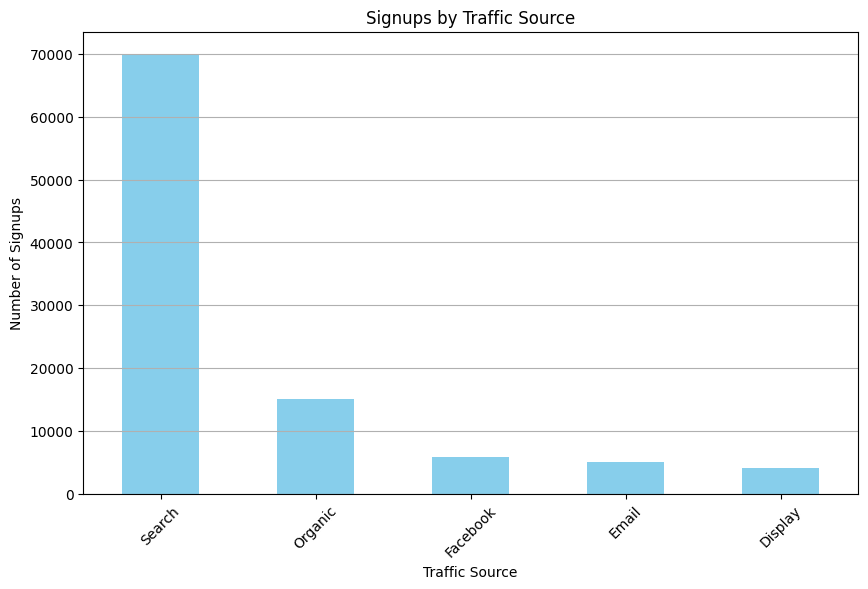

In [49]:
traffic_signups = pd_users['traffic_source'].value_counts()

# 그래프 그리기
plt.figure(figsize=(10,6))
traffic_signups.plot(kind='bar', color='skyblue')
plt.title('Signups by Traffic Source')
plt.xlabel('Traffic Source')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)  # x축 라벨 회전
plt.grid(axis='y')  # y축 그리드만 표시
plt.show()


---

# 가입자 중 주문을 하지 않은 고객 비율

In [62]:
pd_users_set = set(pd_users["id"].unique())

In [61]:
pd_orders_set = set(pd_orders["user_id"].unique())

In [65]:
not_order_users = pd_users_set-pd_orders_set

In [73]:
f"{len(not_order_users)/len(pd_users)*100}%"

'19.956%'

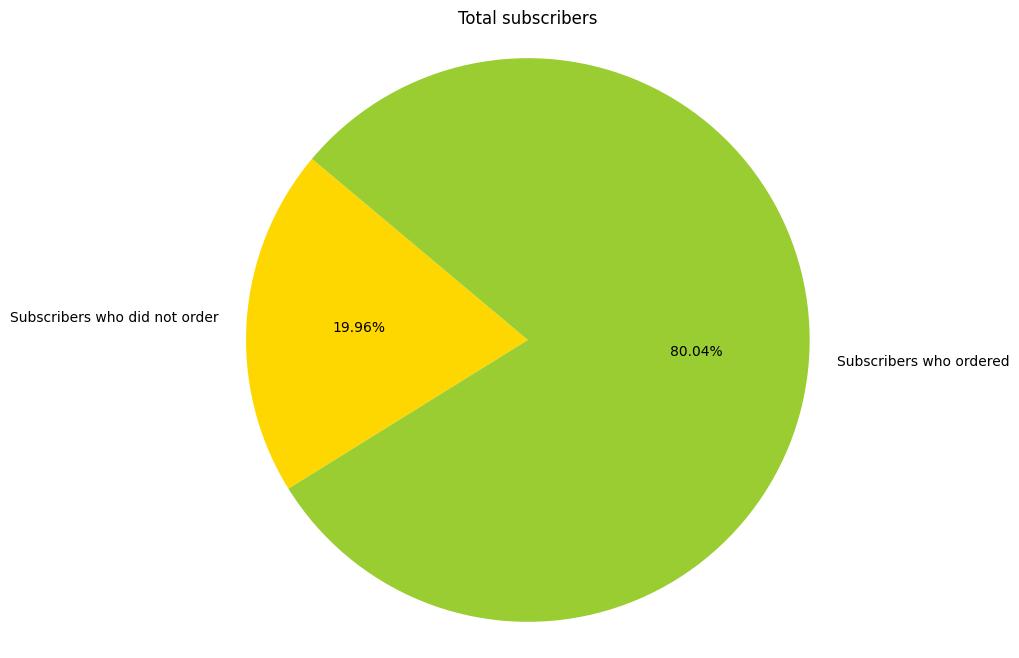

In [91]:
# 데이터 생성
labels = ['Subscribers who did not order',"Subscribers who ordered"]
sizes = [19.956, 100-19.956]  # 각 항목의 크기 (백분율로 표시)
colors = ['gold', 'yellowgreen']  # 각 항목의 색상

# 파이차트 그리기
plt.figure(figsize=(8, 8))  # 차트의 크기 설정 (가로, 세로)
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140)  # autopct는 백분율을 표시하기 위한 서식입니다.
plt.axis('equal')  # 차트를 동그랗게 만듭니다.

# 차트 제목 추가
plt.title('Total subscribers')

# 차트 표시
plt.show()


# 사이트 이용 고객중 가입자 비율

In [103]:
pd_events.drop_duplicates(subset = "session_id")["user_id"].isnull().sum()

500000

In [98]:
pd_events.drop_duplicates(subset = "session_id")["user_id"].value_counts(dropna = False,normalize = True)*100

None       73.339699
32996.0     0.002054
80952.0     0.001907
80546.0     0.001907
34249.0     0.001760
             ...    
9496.0      0.000147
15063.0     0.000147
63030.0     0.000147
3966.0      0.000147
44883.0     0.000147
Name: user_id, Length: 80045, dtype: float64

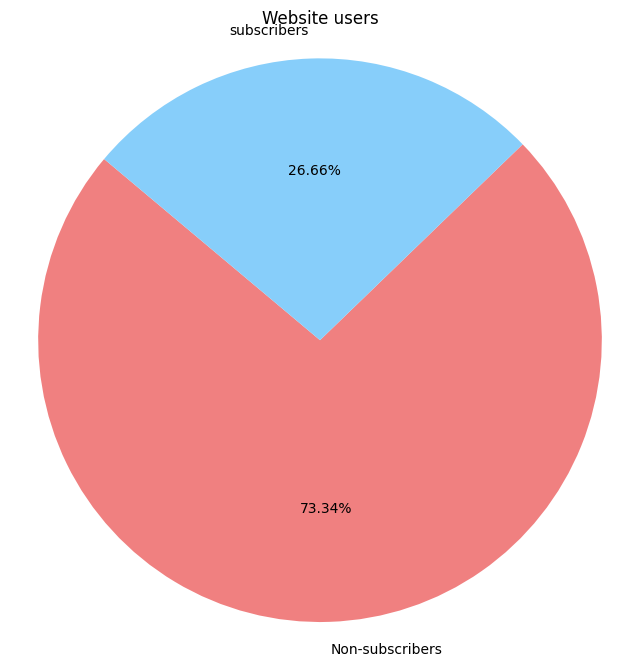

In [101]:
# 데이터 생성
labels = ['Non-subscribers',"subscribers"]
sizes = [73.339699, 100-73.339699]  # 각 항목의 크기 (백분율로 표시)
colors = ['lightcoral', 'lightskyblue']  # 각 항목의 색상

# 파이차트 그리기
plt.figure(figsize=(8, 8))  # 차트의 크기 설정 (가로, 세로)
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140)  # autopct는 백분율을 표시하기 위한 서식입니다.
plt.axis('equal')  # 차트를 동그랗게 만듭니다.

# 차트 제목 추가
plt.title('Website users')

# 차트 표시
plt.show()

---

# 주문 이행 분석
주문 order_items.csv와 orders.csv를 분석하여 주문 이행 일정과 상태를 이해합니다.  

In [50]:
# 데이터 탐색
print("Order Items 데이터 예시:")
print(pd_order_items.head())
print("\nOrders 데이터 예시:")
print(pd_orders.head())

Order Items 데이터 예시:
       id  order_id  user_id  product_id  inventory_item_id     status  \
0  152013    104663    83582       14235             410368  Cancelled   
1   40993     28204    22551       14235             110590   Complete   
2   51224     35223    28215       14235             138236   Complete   
3   36717     25278    20165       14235              99072    Shipped   
4  131061     90241    71954       14235             353798    Shipped   

                 created_at                 shipped_at  \
0 2023-05-07 06:08:40+00:00                       None   
1 2023-03-14 03:47:21+00:00  2023-03-15 22:57:00+00:00   
2 2023-12-05 13:25:30+00:00  2023-12-06 01:20:00+00:00   
3 2023-12-22 20:48:19+00:00  2023-12-24 16:44:00+00:00   
4 2022-06-19 16:57:59+00:00  2022-06-19 19:29:00+00:00   

                delivered_at returned_at  sale_price  
0                       None        None        0.02  
1  2023-03-18 01:08:00+00:00        None        0.02  
2  2023-12-10 10:04:0

In [51]:
# 주문 처리 시간 계산
pd_orders['order_date'] = pd.to_datetime(pd_orders['order_date'])
pd_orders['ship_date'] = pd.to_datetime(pd_orders['ship_date'])
pd_orders['processing_time'] = pd_orders['ship_date'] - pd_orders['order_date']

# 주문 상태 파악
def check_order_status(row):
    if row['ship_date'] is pd.NaT:
        return 'Processing'
    else:
        return 'Completed'

pd_orders['order_status'] = pd_orders.apply(check_order_status, axis=1)

# 결과 출력
print("\n처리 시간 및 상태:")
print(pd_orders[['order_id', 'processing_time', 'order_status']])


KeyError: 'order_date'